## VENTANA  HANNING


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.signal import stft

posturas = ['Mano abierta', 'Mano adentro', 'Mano afuera', 'Pinza', 'Puño','Reposo' ]#'Mano abierta', 'Mano adentro', 'Mano afuera', 'Pinza', 'Puño','Reposo' 
sujetos = ['P09','P10']#'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10'

for postura in posturas:
    for sujeto in sujetos:
        data = pd.read_excel(f"C:\\Users\\JUANPABLOGASCA\\Desktop\\Pacientes_6000\\{sujeto}\\{postura.lower()}.xlsx")

        # Seleccionar el número de canales y la longitud de la señal EMG
        num_channels = 8
        signal_length = len(data)


        # Definir la longitud de cada segmento y el overlap
        segment_length = 300
        overlap = 150

        # Calcular el número de segmentos
        num_segments = int((signal_length - segment_length) / overlap + 1)
        #print(num_segments)

        # Recorrer todos los canales
        for channel in range(num_channels):
            # Seleccionar la columna que contiene los datos del canal actual
            emg_signal = data.iloc[:,channel]

            # Segmentar la señal y guardar cada segmento en un archivo PNG
            for i in range(num_segments):
                # Definir los índices de inicio y fin del segmento
                start_index = i * overlap
                end_index = start_index + segment_length

                # Extraer el segmento de la señal
                segment = emg_signal[start_index:end_index]

                # Graficar la señal EMG del segmento
                plt.plot(segment, color='k', label="EMG signal")
                #plt.plot(segment, color='green', label="EMG signal")
                plt.xlabel('Time (samples)')
                plt.ylabel('Amplitude (mV)')
                plt.title(f'Canal {channel+1} - Segmento {i+1}')
                plt.legend()

                #Guardar la señal EMG del segmento
                filename = f"EMG_C{channel+1}_{start_index+1}_{end_index}.png"
                folder = (f"C:\\Users\\JUANPABLOGASCA\\Desktop\\Pacientes_6000\\{sujeto}\\{postura}\\EMG - SIGNAL")
                plt.savefig(folder + "/" + filename)

                # Cerrar la figura para liberar memoria
                plt.close()

                # Calcular la STFT del segmento - Ventana Hanning
                fs = 200
                win_sz = 128
                ham_win = np.hanning(win_sz)
            
                t = np.arange(0, segment_length/fs, 1/fs)
                f, t, Zxx = stft(segment, fs, window=ham_win, nperseg=win_sz, noverlap=64)

                # Graficar la STFT del segmento
                plt.pcolormesh(t, f, np.abs(Zxx), cmap='plasma') #Spectral, and viridis
                plt.axis('off')
                fig = plt.gcf()

                #Guardar la señal STFT del segmento
                filename = f"STFT_C{channel+1}_{start_index+1}_{end_index}_Hanning.png"
                folder0 = (f"C:\\Users\\JUANPABLOGASCA\\Desktop\\Pacientes_6000\\{sujeto}\\{postura}\\HANNING\\Normal_size")
                #folder1 = (f"C:\\Users\\JUANPABLOGASCA\\Desktop\\Pacientes_6000\\{sujeto}\\{postura}\\HANNING\\32")
                #folder2 = (f"C:\\Users\\JUANPABLOGASCA\\Desktop\\Pacientes_6000\\{sujeto}\\{postura}\\HANNING\\64")
                #folder3 = (f"C:\\Users\\JUANPABLOGASCA\\Desktop\\Pacientes_6000\\{sujeto}\\{postura}\\HANNING\\128")
                fig = plt.gcf()
                plt.savefig(folder0 + "/" + filename, bbox_inches='tight', pad_inches=0)

                #fig.set_size_inches(32/80, 32/80) # 1 inch = 80 pixels, 32x32 pixels = 0.4x0.4 inches
                #plt.savefig(folder1 + "/" + filename, bbox_inches='tight', pad_inches=0, dpi=105)
                #fig.set_size_inches(64/fig.dpi, 64/fig.dpi) # 1 inch = 80 pixels, 64x64 pixels = 0.8x0.8 inches
                #plt.savefig(folder2 + "/" + filename, bbox_inches='tight', pad_inches=0, dpi=130)
                #fig.set_size_inches(128/fig.dpi, 128/fig.dpi) # 1 inch = 80 pixels, 128x128 pixels = 1.6x1.6 inches
                #plt.savefig(folder3 + "/" + filename, bbox_inches='tight', pad_inches=0, dpi=130)

                # Cerrar la figura para liberar memoria
                plt.close()



## VENTANA HAMMING

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.signal import stft

posturas = ['Mano abierta', 'Mano adentro', 'Mano afuera', 'Pinza', 'Puño','Reposo']#'Mano abierta', 'Mano adentro', 'Mano afuera', 'Pinza', 'Puño','Reposo' 
sujetos = ['P09','P10']#'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10'

for postura in posturas:
    for sujeto in sujetos:
        data = pd.read_excel(f"C:\\Users\\JUANPABLOGASCA\\Desktop\\Pacientes_6000\\{sujeto}\\{postura.lower()}.xlsx")

        # Seleccionar el número de canales y la longitud de la señal EMG
        num_channels = 8
        signal_length = len(data)


        # Definir la longitud de cada segmento y el overlap
        segment_length = 300
        overlap = 150

        # Calcular el número de segmentos
        num_segments = int((signal_length - segment_length) / overlap + 1)
        #print(num_segments)

        # Recorrer todos los canales
        for channel in range(num_channels):
            # Seleccionar la columna que contiene los datos del canal actual
            emg_signal = data.iloc[:,channel]

            # Segmentar la señal y guardar cada segmento en un archivo PNG
            for i in range(num_segments):
                # Definir los índices de inicio y fin del segmento
                start_index = i * overlap
                end_index = start_index + segment_length

                # Extraer el segmento de la señal
                segment = emg_signal[start_index:end_index]

                # Graficar la señal EMG del segmento
                plt.plot(segment, color='k', label="EMG signal")
                #plt.plot(segment, color='green', label="EMG signal")
                plt.xlabel('Time (samples)')
                plt.ylabel('Amplitude (mV)')
                plt.title(f'Canal {channel+1} - Segmento {i+1}')
                plt.legend()

                #Guardar la señal EMG del segmento
                filename = f"EMG_C{channel+1}_{start_index+1}_{end_index}.png"
                folder = (f"C:\\Users\\JUANPABLOGASCA\\Desktop\\Pacientes_6000\\{sujeto}\\{postura}\\EMG - SIGNAL")
                plt.savefig(folder + "/" + filename)

                # Cerrar la figura para liberar memoria
                plt.close()

                # Calcular la STFT del segmento - Ventana Hanning
                fs = 200
                win_sz = 128
                ham_win = np.hamming(win_sz)
            
                t = np.arange(0, segment_length/fs, 1/fs)
                f, t, Zxx = stft(segment, fs, window=ham_win, nperseg=win_sz, noverlap=64)

                # Graficar la STFT del segmento
                plt.pcolormesh(t, f, np.abs(Zxx), cmap='plasma') #Spectral, and viridis
                plt.axis('off')
                fig = plt.gcf()

                #Guardar la señal STFT del segmento
                filename = f"STFT_C{channel+1}_{start_index+1}_{end_index}_Hanning.png"
                folder0 = (f"C:\\Users\\JUANPABLOGASCA\\Desktop\\Pacientes_6000\\{sujeto}\\{postura}\\HAMMING\\Normal_size")
                #folder1 = (f"C:\\Users\\JUANPABLOGASCA\\Desktop\\Pacientes_6000\\{sujeto}\\{postura}\\HANNING\\32")
                #folder2 = (f"C:\\Users\\JUANPABLOGASCA\\Desktop\\Pacientes_6000\\{sujeto}\\{postura}\\HANNING\\64")
                #folder3 = (f"C:\\Users\\JUANPABLOGASCA\\Desktop\\Pacientes_6000\\{sujeto}\\{postura}\\HANNING\\128")
                fig = plt.gcf()
                plt.savefig(folder0 + "/" + filename, bbox_inches='tight', pad_inches=0)

                #fig.set_size_inches(32/80, 32/80) # 1 inch = 80 pixels, 32x32 pixels = 0.4x0.4 inches
                #plt.savefig(folder1 + "/" + filename, bbox_inches='tight', pad_inches=0, dpi=105)
                #fig.set_size_inches(64/fig.dpi, 64/fig.dpi) # 1 inch = 80 pixels, 64x64 pixels = 0.8x0.8 inches
                #plt.savefig(folder2 + "/" + filename, bbox_inches='tight', pad_inches=0, dpi=130)
                #fig.set_size_inches(128/fig.dpi, 128/fig.dpi) # 1 inch = 80 pixels, 128x128 pixels = 1.6x1.6 inches
                #plt.savefig(folder3 + "/" + filename, bbox_inches='tight', pad_inches=0, dpi=130)

                # Cerrar la figura para liberar memoria
                plt.close()

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, stft
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt

df = pd.read_excel(r"C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\Pacientes_6000\P01\reposo.xlsx")
df


,Canal_1,Canal_2,Canal_3,Canal_4,Canal_5,Canal_6,Canal_7,Canal_8
0,-0.007812,-0.007812,-0.023438,0.000000,0.000000,-0.007812,0.000000,-0.015625
1,-0.007812,-0.007812,-0.007812,0.007812,-0.007812,-0.007812,-0.007812,-0.007812
2,-0.015625,-0.007812,-0.015625,-0.007812,-0.015625,-0.015625,-0.015625,0.000000
3,-0.015625,0.000000,0.000000,-0.015625,-0.007812,-0.007812,-0.007812,-0.015625
4,-0.015625,0.000000,0.000000,-0.015625,0.007812,-0.015625,-0.015625,0.000000
...,...,...,...,...,...,...,...,...
5995,0.000000,-0.007812,-0.023438,-0.007812,-0.007812,-0.015625,-0.007812,-0.007812
5996,0.000000,-0.015625,-0.007812,0.007812,-0.007812,-0.007812,-0.007812,0.007812
5997,-0.007812,-0.007812,0.000000,0.000000,-0.007812,-0.007812,0.000000,-0.015625
5998,0.000000,-0.007812,-0.007812,0.000000,-0.007812,-0.007812,-0.023438,-0.007812


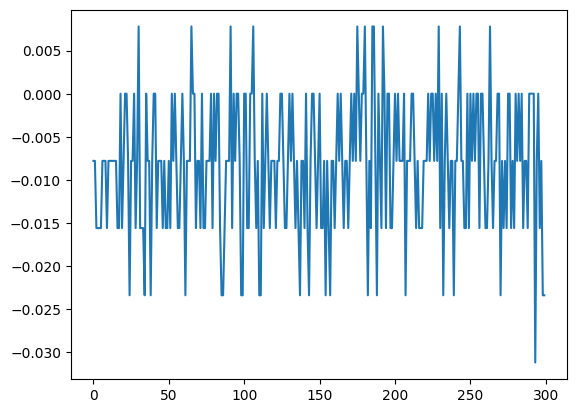

In [78]:
data1=df.iloc[:,0]
data2=data1[0:300]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data2, color='tab:blue')
plt.show()

In [3]:
signal = data1[0:300]

In [79]:
# Set sampling frequency and time vector
fs = 200
t = np.arange(0, len(data2)/fs, 1/fs)

In [80]:
# Set sampling frequency and time vector
fs = 200
t = np.arange(0, len(data2)/fs, 1/fs)
win_sz = 128 # tamaño de la ventana
nfft = win_sz # número de puntos FFT
overlap = 64# número de muestras solapadas
ham_win = np.hanning(win_sz)

f, t, Sxx = stft(data2, fs=fs, window=ham_win, nperseg=win_sz, noverlap=overlap, nfft=nfft)

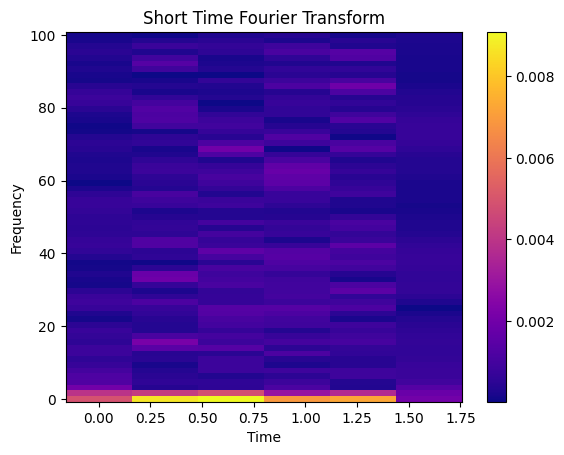

In [81]:
# Graficar el espectrograma
plt.figure()
plt.pcolormesh(t, f, (np.abs(Sxx)), cmap='plasma')
plt.colorbar()
plt.title("Short Time Fourier Transform")
plt.xlabel("Time")
plt.ylabel("Frequency")
fig = plt.gcf()

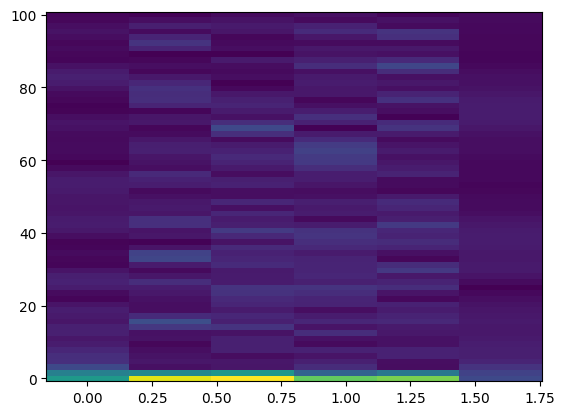

In [10]:
# Graficar el espectrograma
plt.figure()
plt.pcolormesh(t, f, (np.abs(Sxx)), cmap='viridis')
fig = plt.gcf()

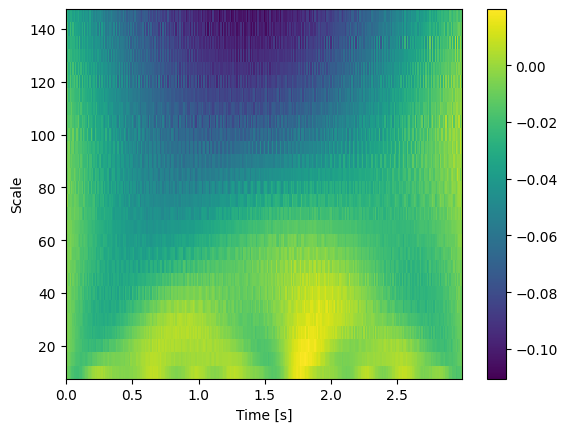

In [10]:
import pywt
import matplotlib.pyplot as plt

# Set sampling frequency and time vector
fs = 100
t = np.arange(0, len(data2)/fs, 1/fs)

# Define mother wavelet and scales for continuous STFT
wavelet = 'morl'
scales = np.arange(0.1, 1.5, 0.05) * fs

# Compute continuous STFT using pywavelets
cwtmatr, _ = pywt.cwt(data2, scales, wavelet)

# Plot spectrogram
plt.pcolormesh(t, scales, (cwtmatr),cmap='viridis')
plt.colorbar()
#plt.gca().invert_yaxis()
plt.xlabel('Time [s]')
plt.ylabel('Scale')
plt.show()


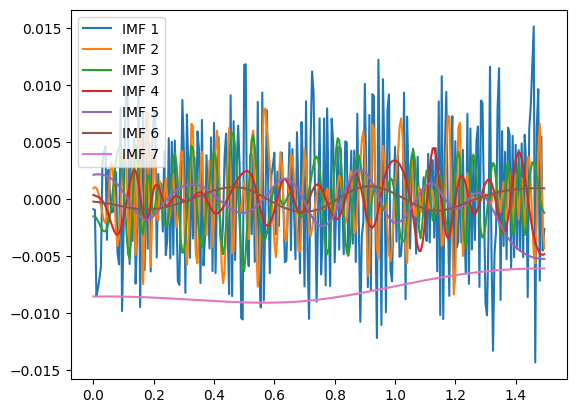

In [4]:

from pyhht import EmpiricalModeDecomposition
import matplotlib.pyplot as plt

# Set sampling frequency and time vector
fs = 200
t = np.arange(0, len(data2)/fs, 1/fs)

# Create instance of EmpiricalModeDecomposition class
decomposer = EmpiricalModeDecomposition(data2)

# Perform Empirical Mode Decomposition (EMD) on signal
imfs = decomposer.decompose()

# Plot each IMF separately
for i, imf in enumerate(imfs):
    plt.plot(t, imf, label=f'IMF {i+1}')

plt.legend()
plt.show()






C:\Users\JUANPABLOGASCA\AppData\Local\Temp\ipykernel_22088\3804376879.py:28: ComplexWarning: Casting complex values to real discards the imaginary part
  hilbert_imfs[i,:] = np.fft.ifft(analytic_signal * hilbert_kernel)


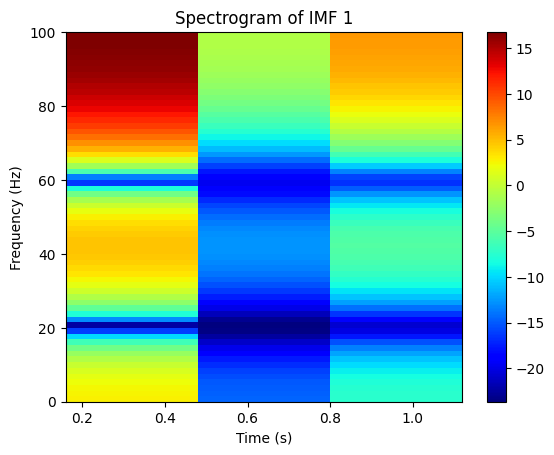

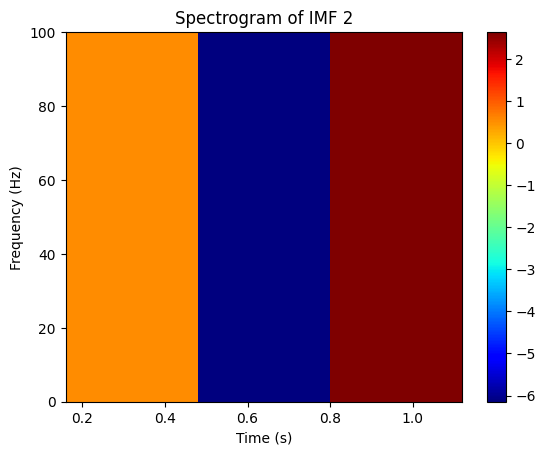

c:\Users\JUANPABLOGASCA\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axes\_axes.py:7728: RuntimeWarning: divide by zero encountered in log10
  Z = 20. * np.log10(spec)


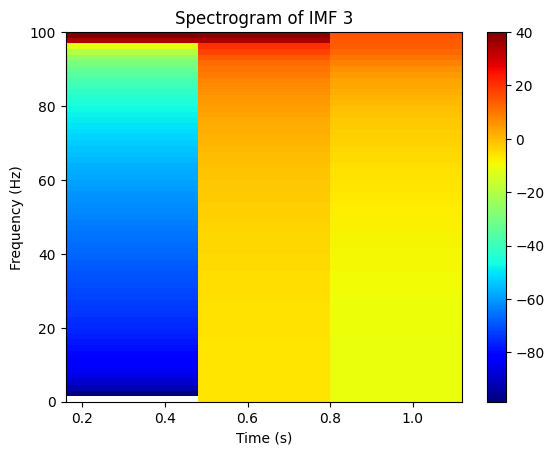

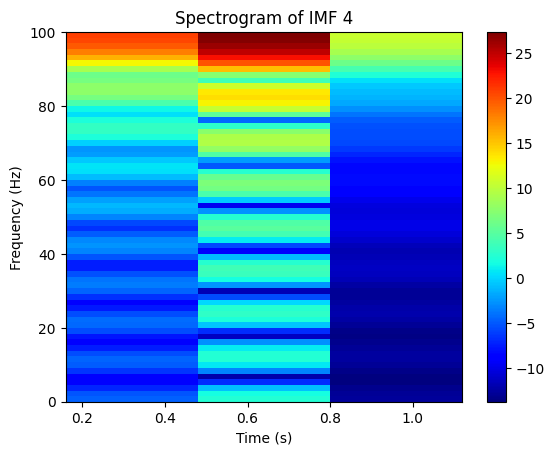

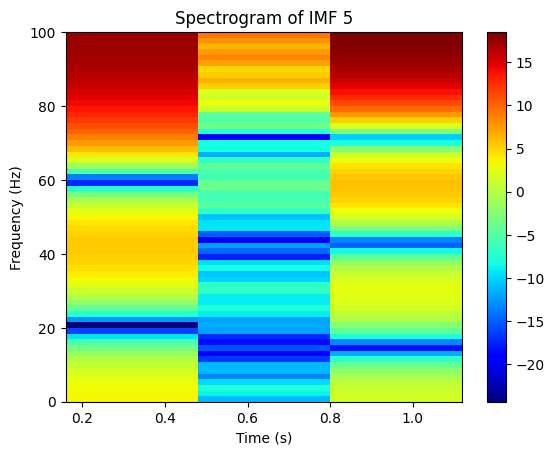

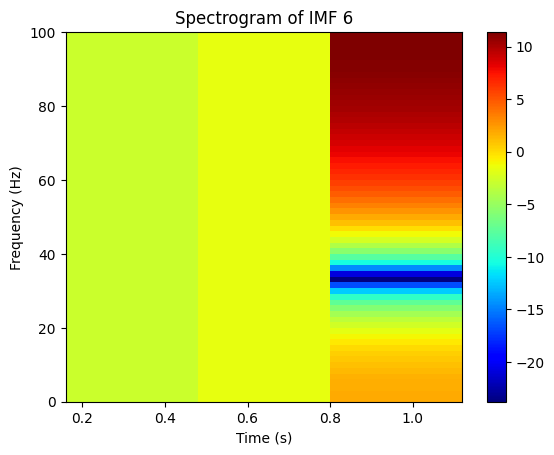

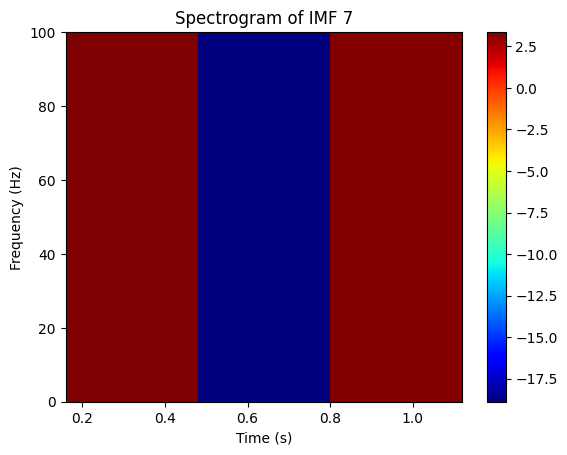

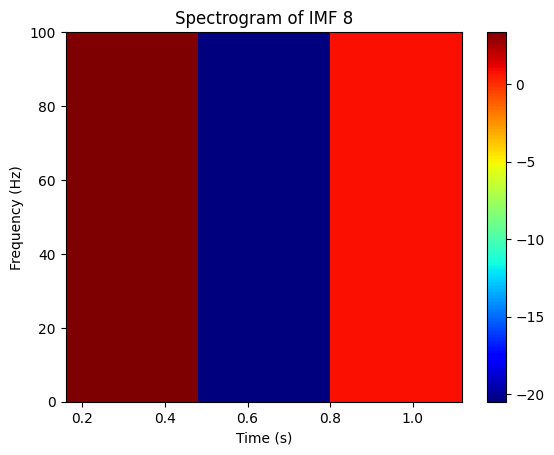

In [20]:
from pyhht import EmpiricalModeDecomposition
import numpy as np
import matplotlib.pyplot as plt

# Set sampling frequency and time vector
fs = 200
t = np.arange(0, len(data2)/fs, 1/fs)

# Create instance of EmpiricalModeDecomposition class
decomposer = EmpiricalModeDecomposition(data2)

# Perform Empirical Mode Decomposition (EMD) on signal
imfs = decomposer.decompose()

# Calculate Hilbert transform of each IMF
hilbert_imfs = np.zeros_like(imfs)
for i, imf in enumerate(imfs):
    analytic_signal = np.fft.fft(imf)
    hilbert_kernel = np.zeros(len(imf))
    if len(imf)%2 == 0:
        hilbert_kernel[0] = hilbert_kernel[-1] = 1
        hilbert_kernel[1:len(imf)//2] = 2
        hilbert_kernel[len(imf)//2:-1] = -2
    else:
        hilbert_kernel[0] = hilbert_kernel[-1] = 1
        hilbert_kernel[1:(len(imf)+1)//2] = 2
        hilbert_kernel[(len(imf)+1)//2:] = -2
    hilbert_imfs[i,:] = np.fft.ifft(analytic_signal * hilbert_kernel)

# Compute instantaneous frequency of each IMF
inst_freqs = np.zeros_like(hilbert_imfs)
for i, hilbert_imf in enumerate(hilbert_imfs):
    inst_phase = np.unwrap(np.angle(hilbert_imf))
    inst_phase = np.append(inst_phase[0], inst_phase) # agregar valor cero al inicio
    inst_freqs[i,:] = np.diff(inst_phase) / (2*np.pi*1/fs)

# Calculate spectrogram of HHT
plt.figure()
for i, inst_freq in enumerate(inst_freqs):
    plt.specgram(inst_freq, Fs=fs, NFFT=128, noverlap=64, cmap='jet', scale='dB', mode='magnitude')
    plt.title(f'Spectrogram of IMF {i+1}')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar()
    plt.show()


In [7]:
%pip install PyHHT
%pip install tftb

Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/402.8 kB ? eta -:--:--
     --------------- ---------------------- 163.8/402.8 kB 3.3 MB/s eta 0:00:01
     -------------------------------------- 402.8/402.8 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for tftb: filename=tftb-0.1.4-py3-none-any.whl size=54777 sha256=c29181cf3d3ce649d36b2c58f23606b56a25116a0628d9780e88fbf24df72680
  Stored in directory: c:\users\juanpablogasca\appdata\local\pip\cache\wheels\38\82\d0\07f6da8c268ec47d798616341bcce5c9cbce837d0e2ba109c7
Successfully built tftb
Note: you may need to restart the kernel to use updated packages.


In [11]:
plt.savefig(r"C:\Users\JUANPABLOGASCA\Desktop\Prueba\prueba.png",bbox_inches='tight', pad_inches=0)

<Figure size 640x480 with 0 Axes>

In [ ]:
# Compute continuous wavelet transform
cwtmatr, freqs = pywt.cwt(signal, np.arange(1,100,1), 'mexh')

In [ ]:
# Plot CWT coefficients
plt.imshow(cwtmatr, cmap='inferno', aspect='auto', extent=[0, 1.5, 100, 0])
plt.gca().invert_yaxis()
plt.axis('off')
plt.savefig(r'D:\TESIS\6000 datos\Datos\P1\Mexican_Hat_img\clase_1\prueba.png', bbox_inches='tight', pad_inches=0)